In [15]:
import matplotlib.pyplot as plt
from pandas.core.common import flatten
import copy
import numpy as np
import random

import torchvision
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader
import cv2

import glob
from tqdm import tqdm

In [6]:
#LOADING THE DATA

#img_path='/home/jorge/ULorraine/Semester 9/Neural_Networks_labs/NN_project/archive/Data/images_original/'
img_path='archive/Data/images_original/'

image_paths=[] #We are storing the path of each spectogram in a list
genres=[] #We are storing the genres

#1. We are going to have the all the spect paths from img_path and genre to its respective lists
# eg. spect path-> 'archive/Data/images_original/blues/blues00078.png'
# eg. genre -> blues

for image_path in glob.glob(img_path + '/*'):
    genres.append(image_path.split('/')[-1]) 
    image_paths.append(glob.glob(image_path + '/*'))
    
image_paths = list(flatten(image_paths))
#random.shuffle(spect_paths)

print('spect_paths example: ', image_paths[0])
print('genre example: ', genres[0])


spect_paths example:  archive/Data/images_original/blues/blues00078.png
genre example:  blues


In [7]:
#We are creating a dictionary for genre indexes

idx_to_genre = {i:j for i, j in enumerate(genres)}
genre_to_idx = {value:key for key,value in idx_to_genre.items()}

print(idx_to_genre)

{0: 'blues', 1: 'disco', 2: 'pop', 3: 'country', 4: 'hiphop', 5: 'classical', 6: 'metal', 7: 'reggae', 8: 'rock', 9: 'jazz'}


In [16]:
#We are going to define a Transform function for the images
data_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                                  torchvision.transforms.Normalize((0.1307,), (0.3081,))])

In [22]:
#We are going to create our Dataset class

class GenreDataset(Dataset):
    def __init__(self, image_paths, transform=False):
        self.image_paths = image_paths
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_filepath = self.image_paths[idx]
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        label = image_filepath.split('/')[-2]
        label = genre_to_idx[label]
        if self.transform is not None:
            image = self.transform(image)
        
        return image, label

In [30]:
#We instanciate the dataset
genre_dataset=GenreDataset(image_paths,transform=data_transforms)
num_genre=len(genres)

print('The shape of tensor for 50th image in genre dataset: ', genre_dataset[49][0].shape)
print('The label for 50th image in genre dataset: ',genre_dataset[49][1])
print('Number of classes in the dataset:',num_genre)
print('Number of images in the genre dataset', len(genre_dataset))

The shape of tensor for 50th image in genre dataset:  torch.Size([3, 288, 432])
The label for 50th image in genre dataset:  0
Number of classes in the dataset: 10
Number of images in the genre dataset 999


In [32]:
#We get a data pair from the dataset
image, label = genre_dataset[0]
print(image.shape)
print('Image label=', label)

torch.Size([3, 288, 432])
Image label= 0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


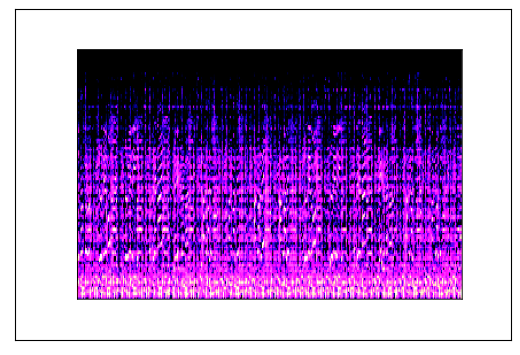

In [35]:
#We are going to plot the image
plt.figure()
plt.imshow(image.permute(1, 2, 0))
plt.xticks([]), plt.yticks([])
plt.show()

In [41]:
#We create the dataloader for the dataset
#NOTE: WE NEED TO SPLIT INTO TRAIN, TEST AND VALID SETS
batch_size=8
genre_dataloader=DataLoader(genre_dataset, batch_size=batch_size, shuffle=True)
print('Dataloader length (number of batches):', len(genre_dataloader))

Dataloader length (number of batches): 125


In [42]:
# Get a batch of images and corresponding labels from the genre dataloader
batch_example = next(iter(genre_dataloader))
image_batch_example = batch_example[0]
labels_batch_example = batch_example[1]

# Print the size of the batch of images and labels
print(image_batch_example.shape)
print(labels_batch_example.shape)

torch.Size([8, 3, 288, 432])
torch.Size([8])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


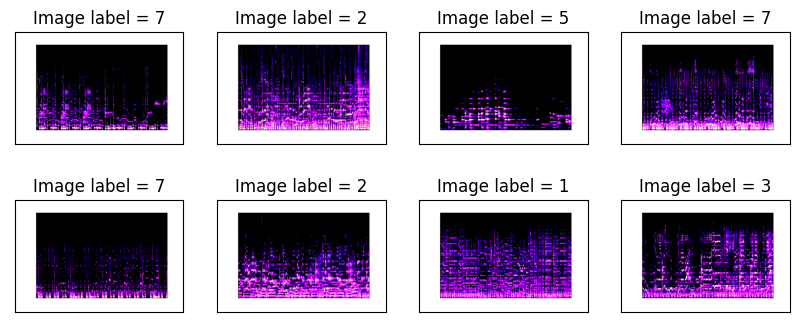

In [51]:
# Plot the images in the batch (along with the corresponding label)
plt.figure(figsize = (10,4))
for ib in range(batch_size):
    plt.subplot(batch_size // 4, 4, ib+1)
    plt.imshow(image_batch_example[ib, :].permute(1, 2, 0))
    plt.xticks([]), plt.yticks([])
    plt.title('Image label = ' + str(labels_batch_example[ib].item()))
plt.show()